In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler
from class_vehicle_data import Vehicle_data

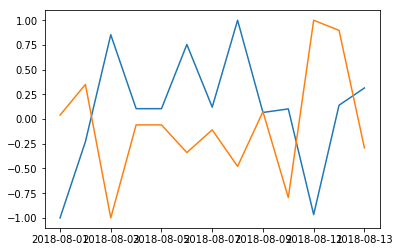

In [8]:
scaler = StandardScaler()

output = ["output_t0","output_t10","output_t20","output_t30","output_t40","output_t50","output_t60","output_t70","output_t80","output_t90","output_t100"]
car_company = ["BMW","Ford","Mercedes","Porsche","Tesla","Toyota"]

file = "data/"+output[2]+"/"+car_company[3]+"_daily_data.txt"

all_cars = [Vehicle_data() for k in range(len(output))]

BMW = Vehicle_data()
BMW.read_in_data(file)
BMW.fill_NA()
y_pos,y_neg,y_neu=BMW.scale_data_Ztransform()
y_pos,y_neg,y_neu=BMW.scale_data_MinMaxTransform(Xmin=-1.0,Xmax=1.0)

#y_scaled = scaler.transform(BMW.car_data["Daily_pos_percent"])
plt.plot(BMW.car_data["Dates"],y_pos)
plt.plot(BMW.car_data["Dates"],y_neg)